In [27]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import os
import seaborn as sns


In [28]:
df = pd.read_csv(r"C:\Users\91917\OneDrive\Desktop\iot_load_data.csv")
df

,Temperature,Humidity,Day_of_Week,Time_of_Day,Holiday_Indicator,Previous_Load,Transportation_Data,Operational_Metrics,IoT_Sensor_Data,External_Factors,...,Regulation_Capacity,Day_Ahead_LMP,Day_Ahead_EC,Day_Ahead_CC,Day_Ahead_MLC,Real_Time_EC,Real_Time_CC,Real_Time_MLC,System_Load,Electricity_Load
0,2,69,3,Afternoon,1,812,25,201,0.808578,Regulatory,...,82,33.526050,13.661695,4.339328,1.568146,18.903664,4.407353,1.385887,518,753
1,14,26,4,Evening,0,963,25,139,0.400364,Other,...,75,44.547889,6.118156,8.685590,4.317611,22.458212,5.615720,2.689898,503,872
2,19,73,5,Afternoon,0,753,11,497,0.748848,Economic,...,87,37.807827,8.405380,6.072040,3.776703,13.400587,1.741812,1.610319,897,525
3,23,59,6,Morning,0,839,16,464,0.213119,Regulatory,...,54,41.700664,9.233539,4.299356,1.900629,16.558408,3.974303,2.798738,526,568
4,28,32,0,Afternoon,0,505,24,142,0.089296,Regulatory,...,97,56.762892,8.772969,2.025394,2.949036,20.760512,4.140475,1.041746,958,636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17054,33,60,5,Evening,0,664,22,110,0.095480,Other,...,99,48.374745,15.776848,9.550220,4.498868,17.709470,4.942861,1.720833,762,541
17055,-9,42,6,Afternoon,0,618,21,160,0.864928,Regulatory,...,84,45.107917,15.023013,7.512798,2.252683,23.651281,2.525749,0.767173,815,759
17056,34,56,0,Afternoon,0,691,28,246,0.140741,Regulatory,...,69,44.967313,8.460213,2.916418,1.394678,10.493837,3.827922,1.010197,735,535
17057,-10,44,1,Evening,0,564,23,381,0.073000,Regulatory,...,74,58.498240,17.480796,7.642207,1.327418,22.008915,7.608274,1.790598,609,591


In [29]:
df.columns

Index(['Temperature', 'Humidity', 'Day_of_Week', 'Time_of_Day',
       'Holiday_Indicator', 'Previous_Load', 'Transportation_Data',
       'Operational_Metrics', 'IoT_Sensor_Data', 'External_Factors',
       'Day_Ahead_Demand', 'Real_Time_LMP', 'Regulation_Capacity',
       'Day_Ahead_LMP', 'Day_Ahead_EC', 'Day_Ahead_CC', 'Day_Ahead_MLC',
       'Real_Time_EC', 'Real_Time_CC', 'Real_Time_MLC', 'System_Load',
       'Electricity_Load'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17059 entries, 0 to 17058
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature          17059 non-null  int64  
 1   Humidity             17059 non-null  int64  
 2   Day_of_Week          17059 non-null  int64  
 3   Time_of_Day          17059 non-null  object 
 4   Holiday_Indicator    17059 non-null  int64  
 5   Previous_Load        17059 non-null  int64  
 6   Transportation_Data  17059 non-null  int64  
 7   Operational_Metrics  17059 non-null  int64  
 8   IoT_Sensor_Data      17059 non-null  float64
 9   External_Factors     17059 non-null  object 
 10  Day_Ahead_Demand     17059 non-null  int64  
 11  Real_Time_LMP        17059 non-null  float64
 12  Regulation_Capacity  17059 non-null  int64  
 13  Day_Ahead_LMP        17059 non-null  float64
 14  Day_Ahead_EC         17059 non-null  float64
 15  Day_Ahead_CC         17059 non-null 

In [31]:
df.isnull().sum()

Temperature            0
Humidity               0
Day_of_Week            0
Time_of_Day            0
Holiday_Indicator      0
Previous_Load          0
Transportation_Data    0
Operational_Metrics    0
IoT_Sensor_Data        0
External_Factors       0
Day_Ahead_Demand       0
Real_Time_LMP          0
Regulation_Capacity    0
Day_Ahead_LMP          0
Day_Ahead_EC           0
Day_Ahead_CC           0
Day_Ahead_MLC          0
Real_Time_EC           0
Real_Time_CC           0
Real_Time_MLC          0
System_Load            0
Electricity_Load       0
dtype: int64

In [32]:
#label encoding
from sklearn.preprocessing import LabelEncoder
non_numeric_columns = df.select_dtypes(exclude=['int', 'float']).columns
for col in non_numeric_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17059 entries, 0 to 17058
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature          17059 non-null  int64  
 1   Humidity             17059 non-null  int64  
 2   Day_of_Week          17059 non-null  int64  
 3   Time_of_Day          17059 non-null  int32  
 4   Holiday_Indicator    17059 non-null  int64  
 5   Previous_Load        17059 non-null  int64  
 6   Transportation_Data  17059 non-null  int64  
 7   Operational_Metrics  17059 non-null  int64  
 8   IoT_Sensor_Data      17059 non-null  float64
 9   External_Factors     17059 non-null  int32  
 10  Day_Ahead_Demand     17059 non-null  int64  
 11  Real_Time_LMP        17059 non-null  float64
 12  Regulation_Capacity  17059 non-null  int64  
 13  Day_Ahead_LMP        17059 non-null  float64
 14  Day_Ahead_EC         17059 non-null  float64
 15  Day_Ahead_CC         17059 non-null 

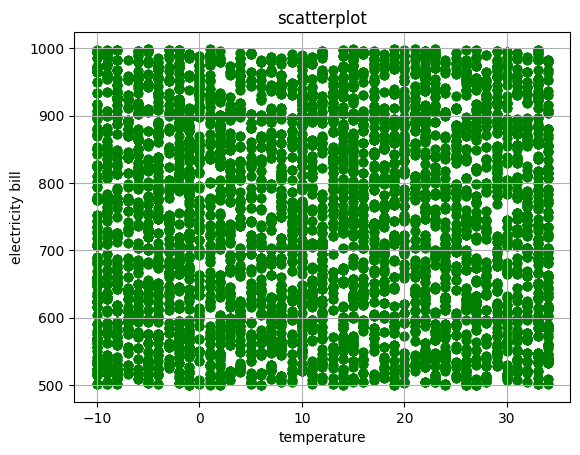

In [33]:
import matplotlib.pyplot as plt
#scatter plot
plt.scatter(df['Temperature'],df['Electricity_Load'],color='green')
plt.title('scatterplot')
plt.xlabel('temperature')
plt.ylabel('electricity bill')
plt.grid(True)
plt.show()

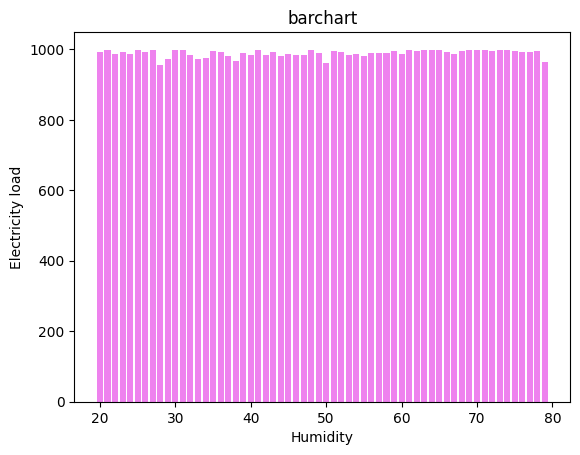

In [34]:
plt.bar(df['Humidity'],df['Electricity_Load'],color='violet')
plt.title('barchart')
plt.xlabel('Humidity')
plt.ylabel('Electricity load')
plt.show()

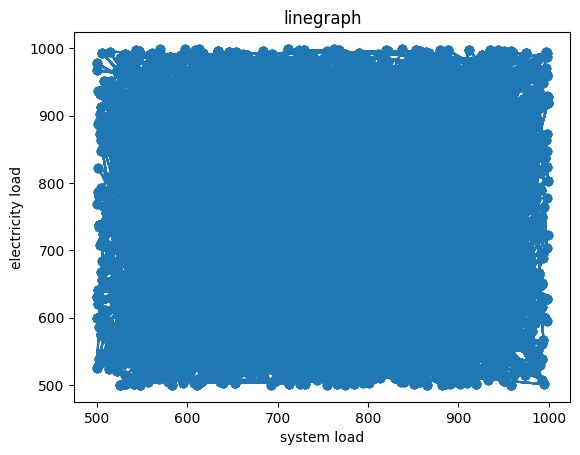

In [35]:
plt.plot(df['System_Load'],df['Electricity_Load'],marker='o',label='data')
plt.title('linegraph')
plt.xlabel('system load')
plt.ylabel('electricity load')
plt.show()

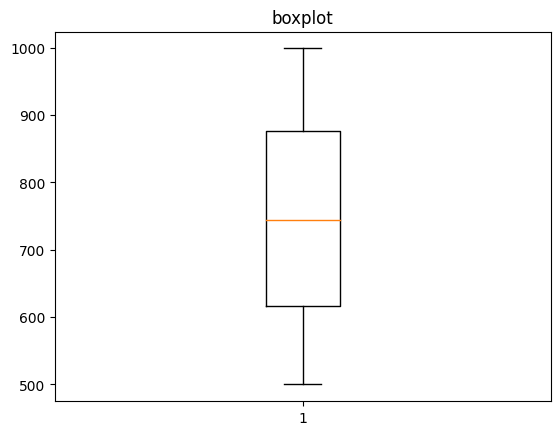

In [36]:
plt.boxplot(df['Electricity_Load'])
plt.title('boxplot')
plt.show()

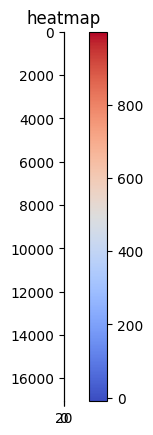

In [37]:
plt.imshow(df,cmap='coolwarm',interpolation='nearest')
plt.colorbar()
plt.title('heatmap')
plt.show()

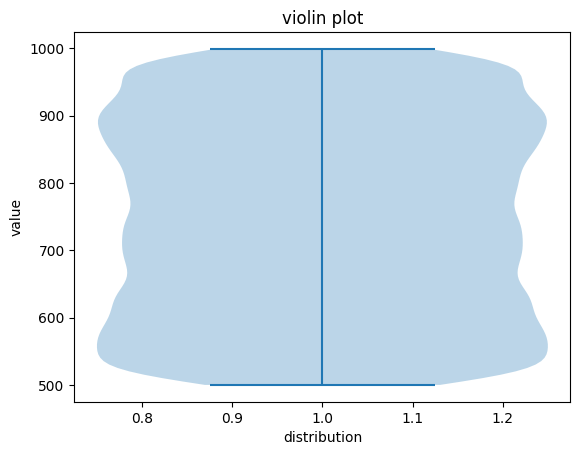

In [38]:
plt.violinplot(df['Electricity_Load'])
plt.xlabel('distribution')
plt.ylabel('value')
plt.title('violin plot')
plt.show()

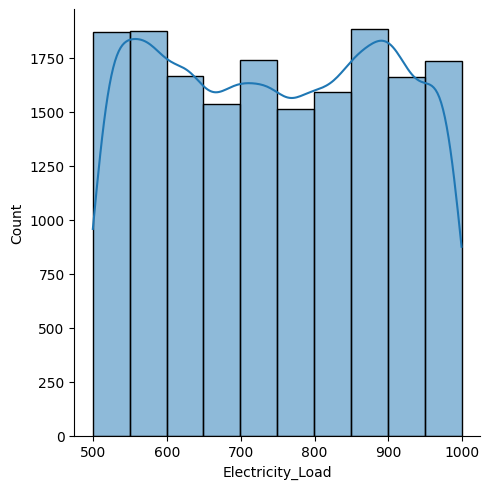

In [39]:
import seaborn as sns
sns.displot(df['Electricity_Load'],bins=10,kde=True)

<AxesSubplot:xlabel='Electricity_Load'>

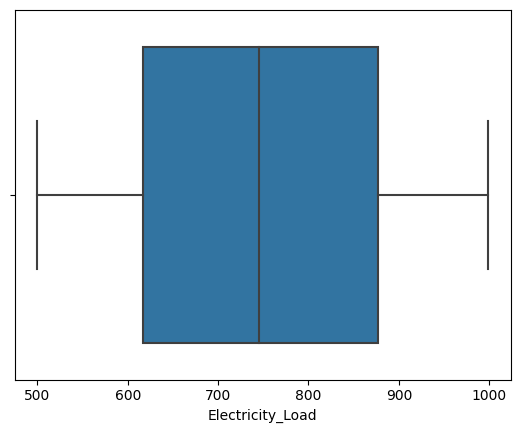

In [40]:
sns.boxplot(x=df['Electricity_Load'])

<AxesSubplot:xlabel='IoT_Sensor_Data', ylabel='Electricity_Load'>

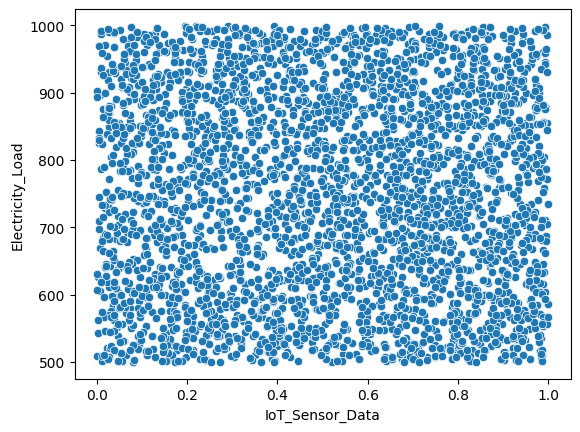

In [41]:
sns.scatterplot(x=df['IoT_Sensor_Data'],y=df['Electricity_Load'])

<AxesSubplot:xlabel='System_Load', ylabel='Electricity_Load'>

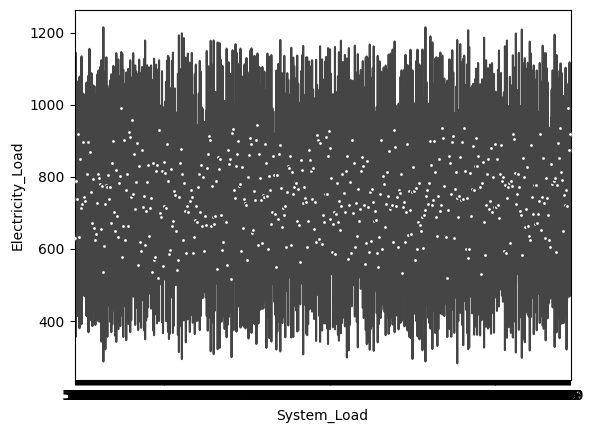

In [42]:
sns.violinplot(x=df['System_Load'],y=df['Electricity_Load'],data=df)

In [43]:
x=df.iloc[:,0:21]
x

,Temperature,Humidity,Day_of_Week,Time_of_Day,Holiday_Indicator,Previous_Load,Transportation_Data,Operational_Metrics,IoT_Sensor_Data,External_Factors,...,Real_Time_LMP,Regulation_Capacity,Day_Ahead_LMP,Day_Ahead_EC,Day_Ahead_CC,Day_Ahead_MLC,Real_Time_EC,Real_Time_CC,Real_Time_MLC,System_Load
0,2,69,3,0,1,812,25,201,0.808578,2,...,25.141389,82,33.526050,13.661695,4.339328,1.568146,18.903664,4.407353,1.385887,518
1,14,26,4,1,0,963,25,139,0.400364,1,...,20.703909,75,44.547889,6.118156,8.685590,4.317611,22.458212,5.615720,2.689898,503
2,19,73,5,0,0,753,11,497,0.748848,0,...,46.367384,87,37.807827,8.405380,6.072040,3.776703,13.400587,1.741812,1.610319,897
3,23,59,6,2,0,839,16,464,0.213119,2,...,49.862441,54,41.700664,9.233539,4.299356,1.900629,16.558408,3.974303,2.798738,526
4,28,32,0,0,0,505,24,142,0.089296,2,...,34.631596,97,56.762892,8.772969,2.025394,2.949036,20.760512,4.140475,1.041746,958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17054,33,60,5,1,0,664,22,110,0.095480,1,...,32.091229,99,48.374745,15.776848,9.550220,4.498868,17.709470,4.942861,1.720833,762
17055,-9,42,6,0,0,618,21,160,0.864928,2,...,43.502861,84,45.107917,15.023013,7.512798,2.252683,23.651281,2.525749,0.767173,815
17056,34,56,0,0,0,691,28,246,0.140741,2,...,29.111099,69,44.967313,8.460213,2.916418,1.394678,10.493837,3.827922,1.010197,735
17057,-10,44,1,1,0,564,23,381,0.073000,2,...,34.085699,74,58.498240,17.480796,7.642207,1.327418,22.008915,7.608274,1.790598,609


In [44]:
y=df.iloc[:,21:]
y

,Electricity_Load
0,753
1,872
2,525
3,568
4,636
...,...
17054,541
17055,759
17056,535
17057,591


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
x_train

,Temperature,Humidity,Day_of_Week,Time_of_Day,Holiday_Indicator,Previous_Load,Transportation_Data,Operational_Metrics,IoT_Sensor_Data,External_Factors,...,Real_Time_LMP,Regulation_Capacity,Day_Ahead_LMP,Day_Ahead_EC,Day_Ahead_CC,Day_Ahead_MLC,Real_Time_EC,Real_Time_CC,Real_Time_MLC,System_Load
12711,27,61,4,2,0,837,36,279,0.751858,2,...,20.924746,80,55.766593,9.953708,2.047750,3.584493,21.486837,7.094582,2.168837,703
9622,-6,31,1,3,0,526,11,163,0.417670,2,...,49.401058,96,58.883931,11.536173,6.147229,1.256213,17.033156,4.313420,2.729232,839
6463,32,36,6,3,0,818,29,182,0.384277,1,...,42.654407,57,48.725778,8.331692,9.612562,2.375939,24.830584,6.574601,1.141383,572
7640,24,52,1,1,0,602,24,286,0.512157,0,...,45.148554,98,49.589779,14.611091,2.730928,1.223976,10.290013,7.903405,1.727631,918
12113,-10,75,1,0,0,903,29,242,0.885268,2,...,37.403735,92,34.666294,12.200356,2.842271,1.704964,22.111523,3.010415,1.110449,855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,17,57,5,3,0,695,29,134,0.013072,0,...,40.486390,74,32.100232,8.308593,2.909014,1.011356,23.007795,4.022340,2.838447,910
11964,6,53,6,0,0,875,39,293,0.356809,0,...,38.042433,86,55.940483,9.809164,4.812793,2.971272,16.233187,5.508292,1.154895,706
5390,18,24,4,1,0,749,49,180,0.469803,0,...,44.656446,85,53.407043,17.278776,7.713921,4.518151,19.695863,7.017676,1.348005,814
860,16,35,2,1,0,750,42,374,0.778055,1,...,25.137888,53,46.396878,6.583906,2.685404,2.406083,13.579757,6.781965,1.453136,585


In [47]:
x_test

,Temperature,Humidity,Day_of_Week,Time_of_Day,Holiday_Indicator,Previous_Load,Transportation_Data,Operational_Metrics,IoT_Sensor_Data,External_Factors,...,Real_Time_LMP,Regulation_Capacity,Day_Ahead_LMP,Day_Ahead_EC,Day_Ahead_CC,Day_Ahead_MLC,Real_Time_EC,Real_Time_CC,Real_Time_MLC,System_Load
10912,-1,48,4,0,0,711,47,284,0.315345,1,...,45.187673,92,32.559123,11.588255,8.636450,2.947358,21.485037,1.501461,2.840689,623
3143,25,27,3,2,0,926,40,166,0.159954,0,...,37.445094,73,49.477809,6.871948,8.851723,2.848744,19.473856,1.980461,2.630011,529
12221,5,34,4,3,0,562,15,479,0.756198,1,...,27.123804,56,44.559481,19.147271,5.605644,3.189673,10.542812,3.930935,2.276521,519
13665,28,23,6,3,0,541,12,380,0.082586,1,...,39.599959,97,48.031785,8.469137,4.669874,1.809419,13.242127,5.273192,1.293802,543
720,10,74,2,3,0,757,49,294,0.330900,1,...,41.659206,94,43.939753,19.587963,6.915922,1.441434,24.628866,6.065171,2.366187,984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,30,71,0,1,0,835,17,441,0.624997,0,...,32.950702,77,43.090604,19.018071,6.746499,3.967821,10.538455,2.142958,2.259351,710
2112,19,52,1,0,0,643,12,385,0.583764,1,...,34.961837,61,54.016387,7.518214,7.274332,4.297185,22.777381,4.413719,1.968545,636
4706,-5,31,6,2,0,769,28,238,0.206280,0,...,26.483839,90,45.603303,10.299830,8.687159,4.684569,18.568972,2.348964,2.867411,757
14187,2,61,4,2,0,751,40,227,0.931689,1,...,25.367636,85,57.656321,13.463383,6.249588,1.851987,15.563330,2.846569,2.688510,984


In [48]:
y_train

,Electricity_Load
12711,867
9622,850
6463,786
7640,525
12113,802
...,...
11284,864
11964,674
5390,672
860,635


In [49]:
y_test

,Electricity_Load
10912,674
3143,786
12221,706
13665,898
720,793
...,...
683,564
2112,588
4706,796
14187,844


In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to calculate regression metrics
def calculateRegressionMetrics(algorithm, predict, testY):
    # Convert to 1D arrays
    predict = np.ravel(predict)
    testY = np.ravel(testY)
    
    # Calculate metrics
    mae = mean_absolute_error(testY, predict)
    mse = mean_squared_error(testY, predict)
    rmse = np.sqrt(mse)
    r2 = r2_score(testY, predict)
    
    # Print metrics
    print(f"{algorithm} Mean Absolute Error (MAE): {mae:.2f}")
    print(f"{algorithm} Mean Squared Error (MSE): {mse:.2f}")
    print(f"{algorithm} Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"{algorithm} R2 Score: {r2:.2f}")
    
    # Scatter plot of actual vs predicted values
    plt.figure(figsize=(7, 7))
    plt.scatter(testY, predict, color='blue', alpha=0.6)
    plt.plot([min(testY), max(testY)], [min(testY), max(testY)], color='red', linestyle='--', linewidth=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{algorithm} Predicted vs Actual Values")
    plt.grid(True)
    plt.show()

c:\users\91917\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Random Forest trained and model weights saved.
Random Forest Mean Absolute Error (MAE): 10.63
Random Forest Mean Squared Error (MSE): 552.54
Random Forest Root Mean Squared Error (RMSE): 23.51
Random Forest R2 Score: 0.97


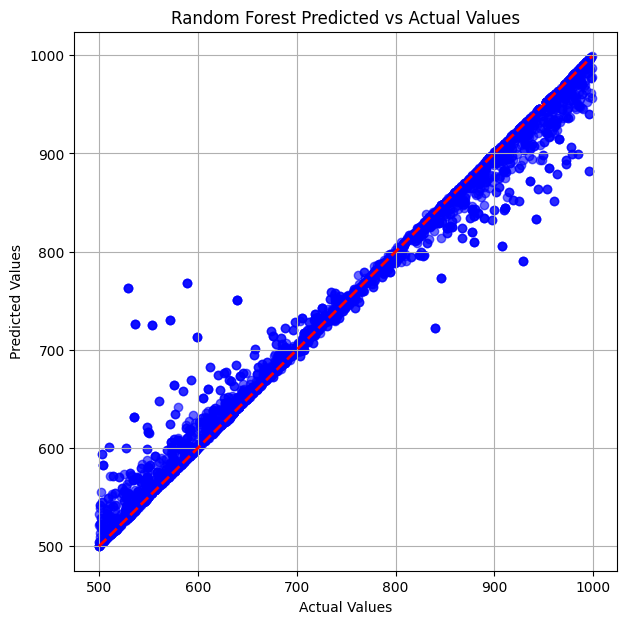

In [52]:
from sklearn.ensemble import RandomForestRegressor
import joblib,os
#os.remove('my_random_forest.pkl')
model = 'my_random_forest.pkl'
if os.path.exists(model):
    # Load the model from the pkl file
    my_random_forest = joblib.load(model)
    predict = my_random_forest.predict(x_test)
    calculateRegressionMetrics("Random Forest", predict, y_test)
else:
    my_random_forest = RandomForestRegressor()
    # Train the classifier on the training data
    my_random_forest.fit(x_train, y_train)
    # Make predictions on the test data
    predict = my_random_forest.predict(x_test)
    joblib.dump(my_random_forest, model)
    print("Random Forest trained and model weights saved.")
    calculateRegressionMetrics("Random Forest", predict, y_test)

In [26]:
sample=df.sample(20)
sample

,Temperature,Humidity,Day_of_Week,Time_of_Day,Holiday_Indicator,Previous_Load,Transportation_Data,Operational_Metrics,IoT_Sensor_Data,External_Factors,...,Regulation_Capacity,Day_Ahead_LMP,Day_Ahead_EC,Day_Ahead_CC,Day_Ahead_MLC,Real_Time_EC,Real_Time_CC,Real_Time_MLC,System_Load,Electricity_Load
8970,-7,44,1,3,0,512,16,126,0.240439,2,...,64,45.625624,12.035575,9.084905,2.136637,21.057063,4.425628,2.603834,574,595
15210,13,66,5,3,0,781,18,343,0.230800,2,...,88,38.067947,16.095867,9.403136,4.165278,11.433323,7.259760,1.265470,756,753
8842,32,29,1,2,0,987,47,166,0.074912,1,...,55,50.820771,8.670967,3.170928,2.941604,21.083246,4.031058,0.869016,802,690
577,29,24,6,0,0,947,14,287,0.486214,0,...,72,38.353171,5.987865,8.225773,2.163373,22.716359,2.701412,2.793075,525,619
7271,14,63,3,0,0,882,45,297,0.814537,0,...,63,48.035865,19.900042,3.236323,4.567776,11.732987,4.219893,0.578072,763,554
6019,-2,71,3,3,0,837,28,169,0.734630,0,...,73,53.975133,19.834317,6.423816,1.322782,16.575686,1.817103,2.049302,505,869
8040,23,62,2,3,1,674,39,123,0.393573,1,...,77,36.926716,14.104697,3.791568,4.174037,17.037628,6.459019,2.289825,811,801
11358,10,29,2,1,0,588,49,455,0.334954,0,...,73,54.864197,9.644866,8.569732,2.738225,12.295130,3.516210,1.168040,713,550
1700,17,52,2,2,0,605,27,494,0.740998,1,...,64,42.863552,5.037936,2.147681,1.927484,16.588515,2.282907,0.543897,926,550
199,34,43,6,2,0,898,31,264,0.036619,0,...,82,54.184635,17.729990,8.410056,3.015339,16.904544,3.983870,1.956566,824,613


In [53]:
sample.drop('Electricity_Load',axis=1,inplace=True)
sample

,Temperature,Humidity,Day_of_Week,Time_of_Day,Holiday_Indicator,Previous_Load,Transportation_Data,Operational_Metrics,IoT_Sensor_Data,External_Factors,...,Real_Time_LMP,Regulation_Capacity,Day_Ahead_LMP,Day_Ahead_EC,Day_Ahead_CC,Day_Ahead_MLC,Real_Time_EC,Real_Time_CC,Real_Time_MLC,System_Load
8970,-7,44,1,3,0,512,16,126,0.240439,2,...,44.654632,64,45.625624,12.035575,9.084905,2.136637,21.057063,4.425628,2.603834,574
15210,13,66,5,3,0,781,18,343,0.230800,2,...,23.054153,88,38.067947,16.095867,9.403136,4.165278,11.433323,7.259760,1.265470,756
8842,32,29,1,2,0,987,47,166,0.074912,1,...,43.311973,55,50.820771,8.670967,3.170928,2.941604,21.083246,4.031058,0.869016,802
577,29,24,6,0,0,947,14,287,0.486214,0,...,38.862404,72,38.353171,5.987865,8.225773,2.163373,22.716359,2.701412,2.793075,525
7271,14,63,3,0,0,882,45,297,0.814537,0,...,49.249329,63,48.035865,19.900042,3.236323,4.567776,11.732987,4.219893,0.578072,763
6019,-2,71,3,3,0,837,28,169,0.734630,0,...,31.427720,73,53.975133,19.834317,6.423816,1.322782,16.575686,1.817103,2.049302,505
8040,23,62,2,3,1,674,39,123,0.393573,1,...,46.013005,77,36.926716,14.104697,3.791568,4.174037,17.037628,6.459019,2.289825,811
11358,10,29,2,1,0,588,49,455,0.334954,0,...,24.404170,73,54.864197,9.644866,8.569732,2.738225,12.295130,3.516210,1.168040,713
1700,17,52,2,2,0,605,27,494,0.740998,1,...,27.790850,64,42.863552,5.037936,2.147681,1.927484,16.588515,2.282907,0.543897,926
199,34,43,6,2,0,898,31,264,0.036619,0,...,47.798255,82,54.184635,17.729990,8.410056,3.015339,16.904544,3.983870,1.956566,824


In [54]:
pred=my_random_forest.predict(sample)
pred

array([595.  , 753.  , 690.  , 619.  , 554.  , 861.65, 801.  , 550.  ,
       567.5 , 616.  , 951.55, 531.  , 847.  , 860.12, 973.  , 764.  ,
       858.  , 988.  , 797.73, 645.97])

In [55]:
sample['predicted as']=pred
sample

,Temperature,Humidity,Day_of_Week,Time_of_Day,Holiday_Indicator,Previous_Load,Transportation_Data,Operational_Metrics,IoT_Sensor_Data,External_Factors,...,Regulation_Capacity,Day_Ahead_LMP,Day_Ahead_EC,Day_Ahead_CC,Day_Ahead_MLC,Real_Time_EC,Real_Time_CC,Real_Time_MLC,System_Load,predicted as
8970,-7,44,1,3,0,512,16,126,0.240439,2,...,64,45.625624,12.035575,9.084905,2.136637,21.057063,4.425628,2.603834,574,595.00
15210,13,66,5,3,0,781,18,343,0.230800,2,...,88,38.067947,16.095867,9.403136,4.165278,11.433323,7.259760,1.265470,756,753.00
8842,32,29,1,2,0,987,47,166,0.074912,1,...,55,50.820771,8.670967,3.170928,2.941604,21.083246,4.031058,0.869016,802,690.00
577,29,24,6,0,0,947,14,287,0.486214,0,...,72,38.353171,5.987865,8.225773,2.163373,22.716359,2.701412,2.793075,525,619.00
7271,14,63,3,0,0,882,45,297,0.814537,0,...,63,48.035865,19.900042,3.236323,4.567776,11.732987,4.219893,0.578072,763,554.00
6019,-2,71,3,3,0,837,28,169,0.734630,0,...,73,53.975133,19.834317,6.423816,1.322782,16.575686,1.817103,2.049302,505,861.65
8040,23,62,2,3,1,674,39,123,0.393573,1,...,77,36.926716,14.104697,3.791568,4.174037,17.037628,6.459019,2.289825,811,801.00
11358,10,29,2,1,0,588,49,455,0.334954,0,...,73,54.864197,9.644866,8.569732,2.738225,12.295130,3.516210,1.168040,713,550.00
1700,17,52,2,2,0,605,27,494,0.740998,1,...,64,42.863552,5.037936,2.147681,1.927484,16.588515,2.282907,0.543897,926,567.50
199,34,43,6,2,0,898,31,264,0.036619,0,...,82,54.184635,17.729990,8.410056,3.015339,16.904544,3.983870,1.956566,824,616.00
